In [1]:
##Now that we've performed EDA and found the most important features needed for the dataset
#Let's go ahead and perform the modelling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Let's start with creating our final dataset
master_data = pd.read_csv("data/Hospital General Information.csv", encoding="latin-1")
master_data = master_data.loc[master_data["Hospital overall rating"] != "Not Available"]
master_data = master_data.loc[master_data["Hospital Type"] == "Acute Care Hospitals"]
master_data["Hospital overall rating"] = master_data["Hospital overall rating"].astype(int)
master_data.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


In [4]:
additional_data = pd.read_csv("data/additional_features.csv")
additional_data.head()

,Provider ID,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,MORT_30_HF_Score,MORT_30_PN_Score,MORT_30_STK_Score,rating_group,READM_30_AMI_Score,READM_30_CABG_Score,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,-12.5,-4.2,-9.3,-12.4,-15.5,-15.4,1.0,-16.5,-15.1,...,-1.870,-0.0,-0.422,-0.787,-6.4,-0.9,-7.1,-2.4,-38.1,-6.9
1,10005,-16.0,NaN,-7.6,-15.5,-20.8,-15.5,1.0,-16.7,NaN,...,-0.386,NaN,-1.388,-0.405,-13.3,-10.2,-5.3,-4.0,-42.8,-5.1
2,10006,-16.7,-4.1,-7.1,-15.6,-18.2,-17.9,0.0,-16.1,-15.2,...,-0.310,NaN,-1.261,-0.513,-11.8,-4.6,-0.0,-4.6,-45.6,-9.1
3,10007,NaN,NaN,-9.3,-14.4,-18.8,-16.6,1.0,NaN,NaN,...,NaN,NaN,NaN,-0.000,-24.3,-6.1,NaN,NaN,NaN,-20.7
4,10008,NaN,NaN,-8.2,-12.7,-15.7,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,-0.585,-3.6,NaN,NaN,-0.6,NaN,-8.2


**Let us join additional details with master data for modelling**

In [5]:
data = pd.merge(master_data, additional_data, on="Provider ID", how="left")
print(data.shape)
data.head()

(3061, 104)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,-1.870,-0.0,-0.422,-0.787,-6.4,-0.9,-7.1,-2.4,-38.1,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,-0.386,NaN,-1.388,-0.405,-13.3,-10.2,-5.3,-4.0,-42.8,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,-0.310,NaN,-1.261,-0.513,-11.8,-4.6,-0.0,-4.6,-45.6,-9.1
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,NaN,NaN,-0.000,-24.3,-6.1,NaN,NaN,NaN,-20.7
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,NaN,NaN,NaN,-0.585,-3.6,NaN,NaN,-0.6,NaN,-8.2


In [6]:
#Let's check all the columns once again
all_cols = list(data.columns)
len(all_cols), all_cols

(104,
 ['Provider ID',
  'Hospital Name',
  'Address',
  'City',
  'State',
  'ZIP Code',
  'County Name',
  'Phone Number',
  'Hospital Type',
  'Hospital Ownership',
  'Emergency Services',
  'Meets criteria for meaningful use of EHRs',
  'Hospital overall rating',
  'Hospital overall rating footnote',
  'Mortality national comparison',
  'Mortality national comparison footnote',
  'Safety of care national comparison',
  'Safety of care national comparison footnote',
  'Readmission national comparison',
  'Readmission national comparison footnote',
  'Patient experience national comparison',
  'Patient experience national comparison footnote',
  'Effectiveness of care national comparison',
  'Effectiveness of care national comparison footnote',
  'Timeliness of care national comparison',
  'Timeliness of care national comparison footnote',
  'Efficient use of medical imaging national comparison',
  'Efficient use of medical imaging national comparison footnote',
  'MORT_30_AMI_Score'

## Modelling 

We'll be starting with the supervised learning techniques. First we'll be building a linear regression model and then proceed to do a random forest model. Before that let's settle on the validation strategy

#### Validation Strategy 
Before we start modelling, we need to decide how are we going to validate our model.
We will just use 20% randomly stratified data, as different ratings have different counts and we would eant to maintain that ratio in our validation data.

For metrics, we will use accuracy for simplicity.

## 1. Linear Regression

It is important to note here that ratings are ordinal, so treating this problem as regression problem might work as well. We'll be treating the ratings as continuous ordinal variables from 1-5 and use it to predict the final ratings.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [8]:
#Let's create a function for creating the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [9]:
#As discussed earlier we'll be creating a simple model with the necessary features only
#Let's store them here in features list
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [10]:
#Let's do the train-test and validation split
train_data, valid_data = train_test_split(data, test_size=0.2,
                                          stratify=data["Hospital overall rating"],
                                          random_state=12345, shuffle=True)
print(train_data.shape, valid_data.shape)

(2448, 104) (613, 104)


These features are of string type. We need to convert above features to numeric type as sklearn estimators require all data in numeric form

In [11]:
#Let's create a simple rating mapping
rating_map = {
    'Above the National average': 2, 'Below the National average': 0,
        'Not Available': np.nan, 'Same as the National average':1
}
for feat in features:
    train_data[feat] = train_data[feat].map(rating_map)
    valid_data[feat] = valid_data[feat].map(rating_map)

In [12]:
train_data[features].isnull().sum()

Mortality national comparison                           151
Safety of care national comparison                      160
Readmission national comparison                          97
Patient experience national comparison                   74
Effectiveness of care national comparison                 0
Timeliness of care national comparison                  114
Efficient use of medical imaging national comparison    443
dtype: int64

There are quite a few missing values. Let's impute them using the mean

In [13]:
#Impute by mean values
#Note: We should only use train data to calcuate means for imputing, otherwise we risk introducing
#information leakage from validation data into training 
mean_values = train_data[features].mean()
train_data[features] = train_data[features].fillna(mean_values)
valid_data[features] = valid_data[features].fillna(mean_values)

In [14]:
X_train = train_data[features]
X_valid = valid_data[features]

y_train = train_data["Hospital overall rating"] - 1
y_valid = valid_data["Hospital overall rating"] - 1

Let's do the regression model and convert output to classes and check our accuracy .
Note that ratings distribution for the features selected is approximately normal as seen during EDA Part 1

In [15]:
y_train.value_counts()

2    1140
3     599
1     527
0      94
4      88
Name: Hospital overall rating, dtype: int64

In [16]:
#Let's build our model and check its accuracy
model = LinearRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)

#we need to clip values and round them to convert to ratings between 0 and 4
train_preds = train_preds.clip(0, 4).round()
print("Training accuracy", accuracy_score(y_train, train_preds))

Training accuracy 0.6907679738562091


Validation accuracy 0.6704730831973899
Confusion matrix, without normalization
[[  3  20   0   0   0]
 [  1  94  37   0   0]
 [  0  21 219  46   0]
 [  0   0  53  92   5]
 [  0   0   5  14   3]]


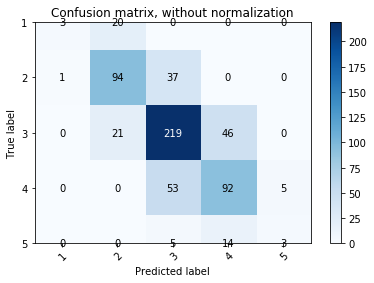

In [17]:
valid_preds = model.predict(X_valid).clip(0, 4).round()
print("Validation accuracy", accuracy_score(y_valid, valid_preds))

plot_confusion_matrix(y_valid, valid_preds, classes=np.array(["1", "2", "3", "4", "5"]))

We're getting ~70% training accuracy and validation accuracy. Let's add some more features and check our model

In [18]:
#Add more features
score_features = [col for col in data.columns if "Score" in col]
print(len(score_features))

75


Since, we are going to use linear model and in EDA Part 2 there are some score which are not normally distributed, it is good practice to normalize all continous features to have normal distribution.

We can use QuantileTransformer (Rank Gauusian transformer) from sklearn for achieving this.

In [19]:
from sklearn.preprocessing import QuantileTransformer
normalize = QuantileTransformer(output_distribution="normal")
train_data[score_features] = normalize.fit_transform(train_data[score_features])
valid_data[score_features] = normalize.transform(valid_data[score_features])

In [20]:
score_features_mean = train_data[score_features].mean()
train_data[score_features] = train_data[score_features].fillna(score_features_mean)
valid_data[score_features] = valid_data[score_features].fillna(score_features_mean)

Training accuracy 0.9084967320261438
Validation accuracy 0.9053833605220228
Confusion matrix, without normalization
[[ 19   4   0   0   0]
 [  4 118  10   0   0]
 [  0   5 268  13   0]
 [  0   0  16 133   1]
 [  0   0   0   5  17]]


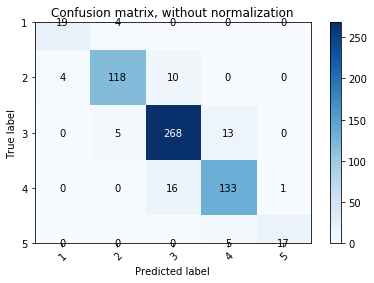

In [21]:
X_train = train_data[features+score_features]
X_valid = valid_data[features+score_features]

model = LinearRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)

#we need to clip values and round them to convert to ratings between 0 and 4
train_preds = train_preds.clip(0, 4).round()
print("Training accuracy", accuracy_score(y_train, train_preds))

valid_preds = model.predict(X_valid).clip(0, 4).round()
print("Validation accuracy", accuracy_score(y_valid, valid_preds))

plot_confusion_matrix(y_valid, valid_preds, classes=np.array(["1", "2", "3", "4", "5"]))

Now  we're getting very good training and validation accuracy (~90%). We can use this model to make predictions and since this is a linear model, it is simple to interpret as well

## 2. Random Forest Model

If our client wanted to get even more accurate model and is comfortable with black box model, we can use decision tree based model to check if we can capture any non-lienarity in our features.

Let's try random forest regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf_model = RandomForestRegressor(n_estimators=500,
                              min_samples_leaf=4,
                              max_features=0.33,
                              n_jobs=-1,
                              random_state=123)

In [24]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.33, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

Training accuracy 0.9681372549019608
Validation accuracy 0.8075040783034257
Confusion matrix, without normalization
[[  8  15   0   0   0]
 [  0 101  31   0   0]
 [  0   9 258  19   0]
 [  0   0  33 117   0]
 [  0   0   0  11  11]]


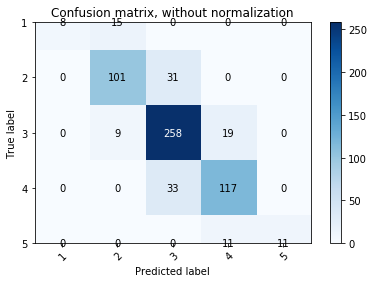

In [25]:
train_preds = rf_model.predict(X_train)

#we need to clip values and round them to convert to ratings between 0 and 4
train_preds = train_preds.clip(0, 4).round()
print("Training accuracy", accuracy_score(y_train, train_preds))

valid_preds = rf_model.predict(X_valid).clip(0, 4).round()
print("Validation accuracy", accuracy_score(y_valid, valid_preds))

plot_confusion_matrix(y_valid, valid_preds, classes=np.array(["1", "2", "3", "4", "5"]))

**Overfits**

So, although random forest model achieves more training accuracy, it gives poor results on validation set. The model is overfitting a lot on training and hence poor generalization.

So, in this particular case, it seems there not much non-linearity and our linear regression model is pretty good.
We will use our regression model for further analysis

## 3. Unsupervised Approach - Factor Analysis and Clustering


In [26]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

def get_train_val_data():
    train_data, valid_data = train_test_split(data, test_size=0.2,
                                              stratify=data["Hospital overall rating"],
                                              random_state=12345, shuffle=True)
    
    # preprocess national comparison measures
    features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']
    
    rating_map = {
    'Above the National average': 2, 'Below the National average': 0,
        'Not Available': np.nan, 'Same as the National average':1
    }
    for feat in features:
        train_data[feat] = train_data[feat].map(rating_map)
        valid_data[feat] = valid_data[feat].map(rating_map)
    
    mean_values = train_data[features].mean()
    train_data[features] = train_data[features].fillna(mean_values)
    valid_data[features] = valid_data[features].fillna(mean_values)
    
    # preprocess individual measures
    score_features = [col for col in data.columns if "Score" in col]
    mean_values = train_data[score_features].mean()
    train_data[score_features] = train_data[score_features].fillna(mean_values)
    valid_data[score_features] = valid_data[score_features].fillna(mean_values)
    
    # standardize all scores
    scaler = StandardScaler()
    train_data[score_features] = scaler.fit_transform(train_data[score_features])
    valid_data[score_features] = scaler.fit_transform(valid_data[score_features])
    
    return train_data, valid_data

train_data, valid_data = get_train_val_data()

In [27]:
#Here we'll be following the CMS Approach for finding the ratings.
#First we'll perform Factor Analysis on the data

fa = FactorAnalysis(1)

mortality_train = train_data.filter(regex="^MORT_*").fillna('median')
mortality_valid = valid_data.filter(regex="^MORT_*").fillna('median')

mort_fa_train = fa.fit_transform(mortality_train)
mort_fa_valid = fa.transform(mortality_valid)

Loading for MORT_30_AMI_Score is 0.5368759937872566
Loading for MORT_30_CABG_Score is 0.29578874741680666
Loading for MORT_30_COPD_Score is 0.6805171652819947
Loading for MORT_30_HF_Score is 0.7852987216283279
Loading for MORT_30_PN_Score is 0.740186929515958
Loading for MORT_30_STK_Score is 0.546729647971555


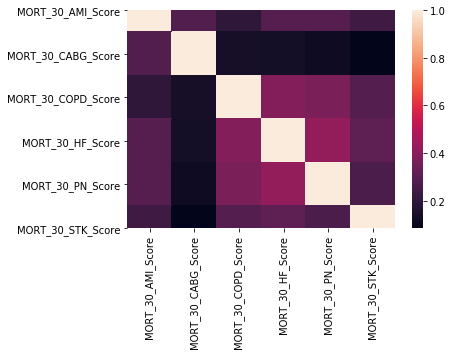

In [28]:
for col in mortality_train.columns:
    print("Loading for {} is {}".format(col, np.corrcoef(mortality_train[col].values, mort_fa_train[:, 0])[0, 1]))
    
sns.heatmap(mortality_train.corr())

In [29]:
from scipy.stats import spearmanr
spearmanr(mort_fa_train.flatten(), train_data["Mortality national comparison"])

SpearmanrResult(correlation=0.6648752536762496, pvalue=2.89779584484e-312)

It can observed that features which are highly correlated (**HF_Score** and **PN_Score**) have higher loading. These loadings will become our weights using which we'll be evaluating the group scores for each hospital

Similarly, we can get latent factor for all groups

In [30]:
#Let's create a function to find the latent factors
def get_latent_factor(train, valid, like=""):

    grp_train = X_train.filter(regex=like).fillna('median')
    grp_valid = X_valid.filter(regex=like).fillna('median')

    grp_fa_train = fa.fit_transform(grp_train)
    grp_fa_valid = fa.transform(grp_valid)
    
    for col in grp_train.columns:
        print("Loading for {} is {}".format(col,
                                            np.corrcoef(grp_train[col].values,
                                                        grp_fa_train[:, 0])[0, 1]))

    sns.heatmap(grp_train.corr())
    plt.show()
    return grp_fa_train, grp_fa_valid

Loading for READM_30_AMI_Score is -0.533620805325556
Loading for READM_30_CABG_Score is -0.24925248916782952
Loading for READM_30_COPD_Score is -0.6153215137759567
Loading for READM_30_HF_Score is -0.716472203939551
Loading for READM_30_HIP_KNEE_Score is -0.3328679560740366
Loading for READM_30_HOSP_WIDE_Score is -0.931534636508105
Loading for READM_30_PN_Score is -0.7274542103342359
Loading for READM_30_STK_Score is -0.5464401640772479


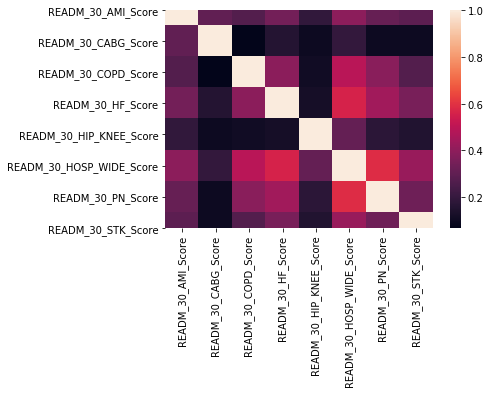

In [31]:
#Measure loadings for Readmissions
readm_fa_train, readm_fa_valid = get_latent_factor(X_train, X_valid, like="^READM_*")

In [32]:
readm_fa_train = -1* readm_fa_train
readm_fa_valid = -1* readm_fa_valid

In [33]:
spearmanr(readm_fa_train.flatten(), train_data["Readmission national comparison"])

SpearmanrResult(correlation=0.8430023137116028, pvalue=0.0)

Loading for TIME_OP_21_Score is 0.7614790710768363
Loading for TIME_OP_5_Score is 0.7513944694991793


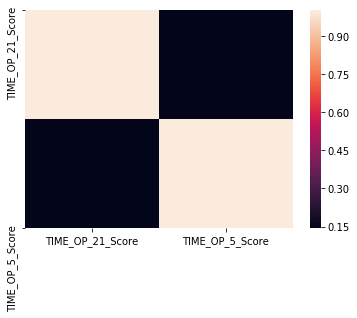

In [34]:
time_fa_train, time_fa_valid = get_latent_factor(X_train, X_valid, like="^TIME_")

Loading for EXP_H_CLEAN_STAR_RATING_Score is 0.6428988353190934
Loading for EXP_H_COMP_1_STAR_RATING_Score is 0.8171781073882218
Loading for EXP_H_COMP_2_STAR_RATING_Score is 0.7165509180430001
Loading for EXP_H_COMP_3_STAR_RATING_Score is 0.8290197175455216
Loading for EXP_H_COMP_4_STAR_RATING_Score is 0.8008645108704427
Loading for EXP_H_COMP_5_STAR_RATING_Score is 0.8193134615291193
Loading for EXP_H_COMP_6_STAR_RATING_Score is 0.6788031195247995
Loading for EXP_H_COMP_7_STAR_RATING_Score is 0.7836571297914312
Loading for EXP_H_HSP_RATING_STAR_RATING_Score is 0.8394540184682641
Loading for EXP_H_QUIET_STAR_RATING_Score is 0.5877821011117076
Loading for EXP_H_RECMND_STAR_RATING_Score is 0.7865815038269272
Loading for EXP_H_STAR_RATING_Score is 0.9578998409269195


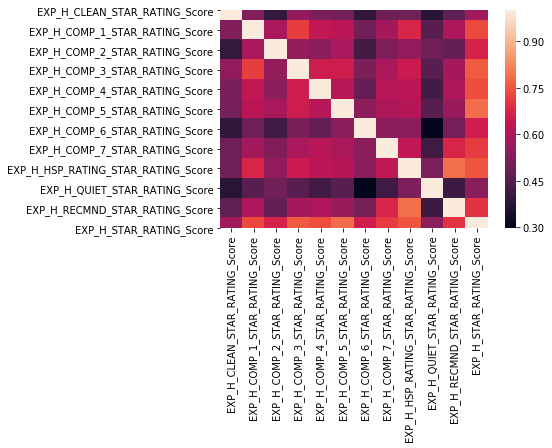

In [35]:
exp_fa_train, exp_fa_valid = get_latent_factor(X_train, X_valid, like="^EXP_")

In [36]:
spearmanr(time_fa_train.flatten(), train_data["Timeliness of care national comparison"])

SpearmanrResult(correlation=0.38644048713411766, pvalue=5.170396287070983e-88)

Loading for MED_OP_10_Score is -0.37032753224039094
Loading for MED_OP_11_Score is -0.9972921127659131
Loading for MED_OP_13_Score is -0.017861012513958344
Loading for MED_OP_14_Score is -0.0005160438059973507
Loading for MED_OP_8_Score is -0.07714765909467045
Loading for MED_OP_9_Score is 0.007017336141706209


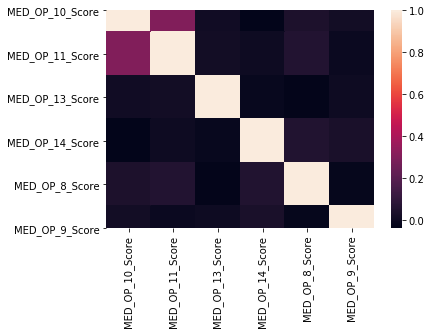

In [37]:
med_fa_train, med_fa_valid = get_latent_factor(X_train, X_valid, like="MED_OP_*")

In [38]:
med_fa_train = -1* med_fa_train
med_fa_valid = -1* med_fa_valid

In [39]:
spearmanr(med_fa_train.flatten(), train_data["Efficient use of medical imaging national comparison"])

SpearmanrResult(correlation=0.36811689654441454, pvalue=1.985980054758922e-79)

Loading for SAFETY_COMP_HIP_KNEE_Score is -0.009936316060321288
Loading for SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score is 0.3707653802478654
Loading for SAFETY_PSI_13_POST_SEPSIS_Score is 0.11075721644081839
Loading for SAFETY_PSI_14_POSTOP_DEHIS_Score is -0.08493155664402947
Loading for SAFETY_PSI_15_ACC_LAC_Score is 0.2514458220350238
Loading for SAFETY_PSI_3_ULCER_Score is 0.14903447291968996
Loading for SAFETY_PSI_4_SURG_COMP_Score is 0.1511620910204494
Loading for SAFETY_PSI_6_IAT_PTX_Score is 0.14247838196900084
Loading for SAFETY_PSI_7_CVCBI_Score is 0.13185591111287867
Loading for SAFETY_PSI_90_SAFETY_Score is 0.4862632758035508
Loading for SAFETY_HAI_1_SIR_Score is 0.6822342006509355
Loading for SAFETY_HAI_1a_SIR_Score is 0.6130252895123139
Loading for SAFETY_HAI_2_SIR_Score is 0.6301199425755645
Loading for SAFETY_HAI_2a_SIR_Score is 0.6473174926230328
Loading for SAFETY_HAI_3_SIR_Score is 0.2856216771995528
Loading for SAFETY_HAI_4_SIR_Score is 0.1627159501011871
Loading for SAF

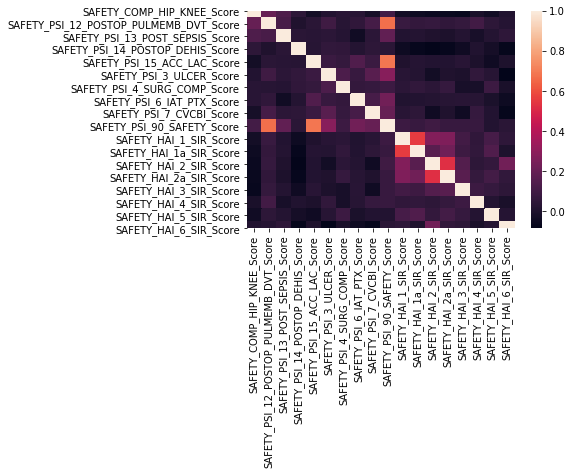

In [40]:
safety_fa_train, safety_fa_valid = get_latent_factor(X_train, X_valid, like="^SAFETY_")

In [41]:
spearmanr(safety_fa_train.flatten(), train_data["Safety of care national comparison"])

SpearmanrResult(correlation=0.3863412566761482, pvalue=5.774477096260802e-88)

Loading for EFF_EDV_Score is -0.5711040663817987
Loading for EFF_ED_1b_Score is -0.992207621619571
Loading for EFF_ED_2b_Score is -0.8978611479399913
Loading for EFF_IMM_2_Score is -0.17398788158162087
Loading for EFF_IMM_3_OP_27_FAC_ADHPCT_Score is -0.10363753449951431
Loading for EFF_OP_18b_Score is -0.7544287865736274
Loading for EFF_OP_20_Score is -0.4684121740892797
Loading for EFF_OP_22_Score is -0.32872661082787585
Loading for EFF_OP_29_Score is -0.04510152553336821
Loading for EFF_OP_30_Score is -0.07619480691023595
Loading for EFF_OP_4_Score is -0.0025395066795107207
Loading for EFF_PC_01_Score is -0.04243524086139974
Loading for EFF_STK_1_Score is -0.13764786045417168
Loading for EFF_STK_10_Score is -0.07879242772847496
Loading for EFF_STK_2_Score is -0.08380552109374449
Loading for EFF_STK_4_Score is -0.008106694855172129
Loading for EFF_STK_5_Score is -0.12295906968903272
Loading for EFF_STK_6_Score is -0.028376062621746013
Loading for EFF_VTE_1_Score is -0.1136865024272058

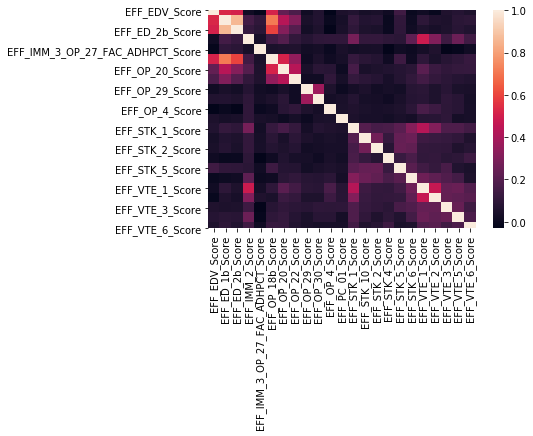

In [42]:
eff_fa_train, eff_fa_valid = get_latent_factor(X_train, X_valid, like="^EFF_")

In [43]:
eff_fa_train = -1 * eff_fa_train
eff_fa_valid = -1 * eff_fa_valid

In [44]:
spearmanr(eff_fa_train.flatten(), train_data["Effectiveness of care national comparison"])

SpearmanrResult(correlation=-0.06578203306116559, pvalue=0.0011276293531816911)

In [45]:
weighted_train = mort_fa_train*0.22 + safety_fa_train*0.22 + readm_fa_train*0.22 +\
                 exp_fa_train*0.22 + eff_fa_train*0.04 + time_fa_train*0.04 + med_fa_train*0.04

weighted_test = mort_fa_valid*0.22 + safety_fa_valid*0.22 + readm_fa_valid*0.22 +\
                 exp_fa_valid*0.22 + eff_fa_valid*0.04 + time_fa_valid*0.04 + med_fa_valid*0.04

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans = KMeans(5)
kmeans.fit(weighted_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
valid_preds = kmeans.predict(weighted_test)

In [49]:
tmp = pd.DataFrame({'y_valid': y_valid, 'y_preds': valid_preds})
tmp['avg_rating'] = tmp.groupby('y_preds')['y_valid'].transform('mean')
tmp = tmp.sort_values(by="avg_rating").drop_duplicates(subset=["y_preds"])
tmp.head()

,y_valid,y_preds,avg_rating
1715,1,4,0.448276
580,2,2,1.220472
2817,2,1,1.917476
2074,2,3,2.532258
77,3,0,3.200000


In [62]:
#Let's round off the average rating and map the predicted ratings for each cluster to the ratings classes
class_map = {4:0, 2:1, 1:2, 3:3, 0:4}

In [63]:
valid_preds_mapped = np.array([class_map[it] for it in valid_preds])
print("Validation accuracy", accuracy_score(y_valid, valid_preds_mapped))

Validation accuracy 0.6150081566068516


## Provider Analysis

Next we would like to do some analysis on our model and understand some of the results. 
**eli5** is a great library to visualize weights of the model and interpret the results.

Documentation and tutorials for the library can be found here:
https://eli5.readthedocs.io/en/latest/

In [52]:
#Lets install the library if you already dont have it
!pip install eli5

     |████████████████████████████████| 112kB 2.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/c2/fd/202954b3f0eb896c53b7b6f07390851b1fd2ca84aa95880d7ae4f434c4ac/tabulate-0.8.3.tar.gz
  Stored in directory: /home/mohsin/.cache/pip/wheels/2b/67/89/414471314a2d15de625d184d8be6d38a03ae1e983dbda91e84
Successfully built tabulate
You should consider upgrading via the 'pip install --upgrade pip' command.


In [53]:

import eli5
eli5.show_weights(model, feature_names=features+score_features)

Weight?,Feature
+1.519,<BIAS>
+0.288,READM_30_HOSP_WIDE_Score
+0.234,SAFETY_PSI_90_SAFETY_Score
+0.138,Patient experience national comparison
+0.111,MORT_30_PN_Score
+0.108,MORT_30_HF_Score
+0.107,Mortality national comparison
+0.067,MORT_30_COPD_Score
+0.061,Readmission national comparison
+0.059,Efficient use of medical imaging national comparison


### Observations

* Patient experience has highest positive correlation (amongst the groups) with hospital rating
* Hospital wide readmissions after discharge score has highest positive correlation with rating
* Mortality related scores are also in top 10

In [54]:
train_data.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
775,110111,UNIVERSITY HOSPITAL MCDUFFIE,2460 WASHINGTON ROAD,THOMSON,GA,30824,MCDUFFIE,7065951411,Acute Care Hospitals,Government - Hospital District or Authority,...,-8.771583e-16,1.020852e-15,-1.302523e-15,1.127578e-15,1.317802e-01,-5.012947e-16,-4.378360e-15,3.092716e-16,-1.506175e-15,4.625502e-01
1235,190167,MERCY REGIONAL MEDICAL CENTER,800 E MAIN,VILLE PLATTE,LA,70586,EVANGELINE,3373635684,Acute Care Hospitals,Proprietary,...,-8.771583e-16,1.020852e-15,-1.302523e-15,3.825811e-01,-7.758025e-01,-1.709204e+00,-2.303487e+00,-1.418012e-01,4.586524e-01,-7.961340e-01
453,50765,KAISER FOUNDATION HOSPITAL-MORENO VALLEY,27300 IRIS AVENUE,MORENO VALLEY,CA,92555,RIVERSIDE,9512516000,Acute Care Hospitals,Voluntary non-profit - Other,...,-8.771583e-16,1.020852e-15,-1.302523e-15,-1.549151e+00,-1.942398e-16,-5.012947e-16,-4.378360e-15,3.092716e-16,-1.506175e-15,2.884996e-15
617,100121,BARTOW REGIONAL MEDICAL CENTER,2200 OSPREY BLVD,BARTOW,FL,33831,POLK,8635338111,Acute Care Hospitals,Proprietary,...,-8.771583e-16,1.020852e-15,-1.302523e-15,4.841443e-01,4.707568e-01,-5.012947e-16,-4.378360e-15,3.092716e-16,-1.506175e-15,-1.058878e-01
3048,670077,METHODIST WEST HOUSTON HOSPITAL,18500 KATY FREEWAY,HOUSTON,TX,77094,HARRIS,8325221000,Acute Care Hospitals,Voluntary non-profit - Private,...,8.289649e-01,1.020852e-15,-1.110332e+00,-2.976539e-02,-7.320636e-01,1.533413e-01,-4.378360e-15,9.724670e-01,-2.106249e+00,-6.946272e-01


As given in the problem statement we need to provide recommendations for the hospital with Provider ID = 140010 (EVANSTON HOSPITAL). Let's go ahead and analyze it.

In [55]:
data_evanston = train_data.loc[data["Provider ID"] == 140010]
data_evanston

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
840,140010,EVANSTON HOSPITAL,2650 RIDGE AVE,EVANSTON,IL,60201,COOK,8474328000,Acute Care Hospitals,Voluntary non-profit - Other,...,-0.338764,1.964002,0.243257,-0.245079,0.262997,0.190968,-0.516509,0.554616,0.39506,0.726468


In [56]:
rating_prediction = model.predict(data_evanston[features+score_features])[0]
print("Predicted and actual ratings are ", rating_prediction, data_evanston["Hospital overall rating"].values[0])

Predicted and actual ratings are  1.9851769166527449 3


So apparently, Evanston hospital has an average rating prediction. Our predicted rating is not very far from actual rating.Lets find out which factors are contributing to their low rating

In [57]:
eli5.explain_prediction(model, data_evanston[features+score_features], feature_names=features+score_features)

Explanation(estimator='LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)', description=None, error=None, method='linear model', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=1.5193617887743671, std=None, value=1.0), FeatureWeight(feature='Mortality national comparison', weight=0.21345490743094364, std=None, value=2.0), FeatureWeight(feature='MORT_30_HF_Score', weight=0.1873888000993064, std=None, value=1.7377595964130808), FeatureWeight(feature='MORT_30_PN_Score', weight=0.16981919676353244, std=None, value=1.5334797063394776), FeatureWeight(feature='MORT_30_COPD_Score', weight=0.13797186327050548, std=None, value=2.0553889385341), FeatureWeight(feature='READM_30_HOSP_WIDE_Score', weight=0.12361016571890635, std=None, value=0.42858834273799545), FeatureWeight(feature='Readmission national comparison', weight=0.12163818651813235, std=None, value=2.0), FeatureWeight(feature='Efficient use of medical imaging national comparison', weight=0.1172376785269644, std=None, value=2.0), FeatureWeight(feature='MORT_30_AMI_Score', weight=0.11277522664261772, std=None, value=2.5908520171027383), FeatureWeight(feature='Effectiveness of care national comparison', weight=0.07776175165301202, std=None, value=2.0), FeatureWeight(feature='MORT_30_STK_Score', weight=0.055268805625602796, std=None, value=1.5765593829553486), FeatureWeight(feature='SAFETY_PSI_4_SURG_COMP_Score', weight=0.03705054828775044, std=None, value=3.626652996738214), FeatureWeight(feature='MORT_30_CABG_Score', weight=0.03209574744398765, std=None, value=2.235519530544019), FeatureWeight(feature='EFF_ED_1b_Score', weight=0.026762646714189563, std=None, value=0.4759771823522187), FeatureWeight(feature='EXP_H_RECMND_STAR_RATING_Score', weight=0.019868610762269378, std=None, value=0.9193325263079135), FeatureWeight(feature='READM_30_HIP_KNEE_Score', weight=0.017486328904191613, std=None, value=1.8301324793955156), FeatureWeight(feature='SAFETY_PSI_14_POSTOP_DEHIS_Score', weight=0.015584643149735043, std=None, value=1.4950626000211371), FeatureWeight(feature='SAFETY_PSI_3_ULCER_Score', weight=0.012528162246863971, std=None, value=0.8440610573087256), FeatureWeight(feature='EXP_H_HSP_RATING_STAR_RATING_Score', weight=0.01234566333720426, std=None, value=0.6806376079482818), FeatureWeight(feature='READM_30_HF_Score', weight=0.01144773886885719, std=None, value=0.5212806040747133), FeatureWeight(feature='SAFETY_PSI_6_IAT_PTX_Score', weight=0.010982135973474754, std=None, value=1.488473111938368), FeatureWeight(feature='SAFETY_PSI_15_ACC_LAC_Score', weight=0.010752679487091263, std=None, value=0.2475491203455103), FeatureWeight(feature='READM_30_AMI_Score', weight=0.010559990672054256, std=None, value=0.48746342470735243), FeatureWeight(feature='READM_30_PN_Score', weight=0.009726317173713953, std=None, value=0.4096426758119089), FeatureWeight(feature='MED_OP_10_Score', weight=0.007226692982456298, std=None, value=0.26299694119865047), FeatureWeight(feature='EXP_H_CLEAN_STAR_RATING_Score', weight=0.005339839390204936, std=None, value=0.31160494428386604), FeatureWeight(feature='EFF_OP_30_Score', weight=0.003910158670596825, std=None, value=0.6566082750249522), FeatureWeight(feature='READM_30_COPD_Score', weight=0.0037047426280566393, std=None, value=0.23664460119390793), FeatureWeight(feature='MED_OP_14_Score', weight=0.003331108103364497, std=None, value=0.5546164104540451), FeatureWeight(feature='EFF_VTE_1_Score', weight=0.003060146851451075, std=None, value=0.4124239081072827), FeatureWeight(feature='SAFETY_PSI_13_POST_SEPSIS_Score', weight=0.0029154373180796484, std=None, value=0.8284902050644665), FeatureWeight(feature='EFF_VTE_3_Score', weight=0.002643001593397559, std=None, value=0.8078963157364423), FeatureWeight(feature='Timeliness of care national comparison', weight=0.002345061854327181, std=None, value=1.0), FeatureWeight(feature='EFF_PC_01_Score', weight=0

In [58]:
#For this hospital, let's go ahead and analyse the group scores first
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']
data_evanston[features]

,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
840,2.0,0.0,2.0,0.0,2.0,1.0,2.0


As you can see the hospital is not doing well in **Safety** and **Patient Experience** which have a very high weightage(22%) towards the ratings. So we'll focus on these ratings

In [59]:
#We'll be skipping the groups having 4% weightage and only groups and scores having 22% will be used for recommendatons
#Using the ELI5 predictions and group weightage, we'll be giving the recommendations.

### Recommendations 1:
1. For Safety, as given by the low negative correlation ELI5 score we can say that the hospital needs to improve PSI_90_SAFETY_Score, SAFETY_PSI_12_POSTOP_PULMEMB_DVT_SCORE,SAFETY_HAI_4_SIR_Score and so on 
2. Similarly, for Experience, it needs to improve its EXP_H_COMP_1_STAR_RATING_Score,EXP_H_COMP_5_STAR_RATING_Score,EXP_H_COMP_6_STAR_RATING_Score and so on

In [61]:
#We observe that some readmission measures and mortality measures in the top
#Let's check their influences as well by loading the measure scores from the main dataset

df_mort_readm2 = pd.read_csv("data/Readmissions and Deaths - Hospital.csv")
features = ['Measure ID', 'Compared to National']
data_evanston2 = df_mort_readm2.loc[df_mort_readm2["Provider ID"] == 140010]
data_evanston2[features]

,Measure ID,Compared to National
15736,MORT_30_AMI,Better than the National Rate
15737,MORT_30_CABG,No Different than the National Rate
15738,MORT_30_COPD,Better than the National Rate
15739,MORT_30_HF,Better than the National Rate
15740,MORT_30_PN,Better than the National Rate
15741,MORT_30_STK,Better than the National Rate
15742,READM_30_AMI,No Different than the National Rate
15743,READM_30_CABG,No Different than the National Rate
15744,READM_30_COPD,No Different than the National Rate
15745,READM_30_HF,No Different than the National Rate


### Recommendations 2:

1. Most Mortality measures are better than national rate and also the only average one MORT_30_CABG  doesn't have a high ELI5 score. Therefore no need to recommend any changes here

2. For Readmission however, most of the measure scores are average only and from the ELI5 score, we can clearly see that READM_30_HOSP_WIDE_Score and Readmission national comparison have a high values. Therefore, in order to improve their ratings they need to focus on all the average measures - READM_30_HOSP_WIDE,READM_30_HF,etc. which'll indirectly improve the group average scores.